RABBIT HOLE TO GO DOWN, MAYBE MAYBE

In [ ]:
import torchio as tio

subject = tio.Subject(image=tio.ScalarImage("input.nii.gz"))
transform = tio.transforms.RandomAffine(scales=(0.9, 1.1), degrees=10)
augmented = transform(subject)
augmented.image.save("output_augmented.nii.gz")

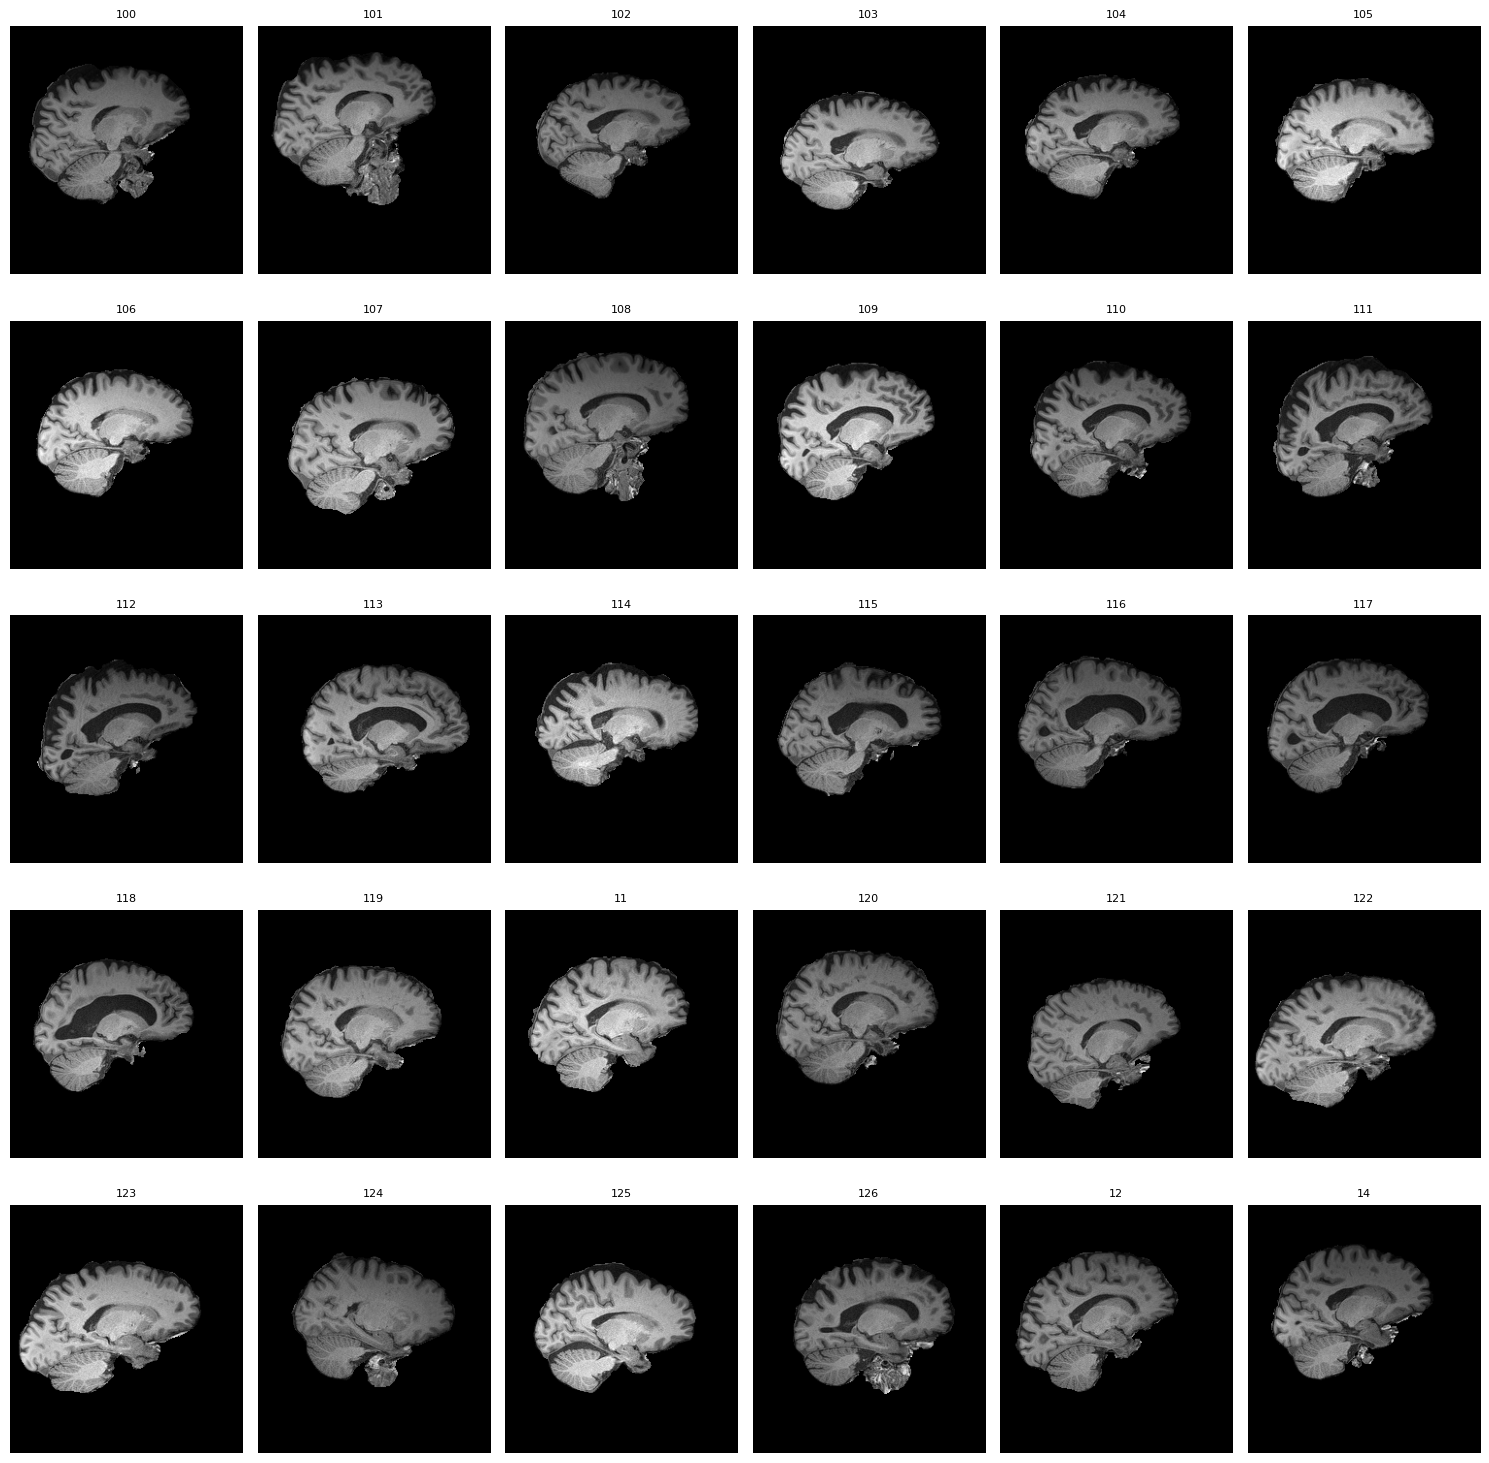

In [1]:
# Lets try to train on these instead (the step before spatial normalization)
import os
import nibabel as nib
import matplotlib.pyplot as plt
import math

# Define the folder containing the NIfTI files
folder_path = r"C:\Users\kiran\Documents\_UIS\sem6\BACH\Data\prepross_208"

# Function to plot the middle slices of images between n1 and n2 in a single figure
def plot_middle_slices_in_range(folder_path, n1, n2, axis=1):
    # Get a sorted list of all files in the directory excluding mask files
    all_files = sorted(
        [f for f in os.listdir(folder_path) if f.endswith('.nii.gz') and not f.endswith('_mask.nii.gz')]
    )
    
    # Filter files between n1 and n2
    selected_files = all_files[n1:n2]
    num_images = len(selected_files)
    
    # Determine grid size for the plot
    cols = math.ceil(math.sqrt(num_images))  # Number of columns in the grid
    rows = math.ceil(num_images / cols)  # Number of rows in the grid
    
    # Create a figure for plotting
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    axes = axes.flatten()  # Flatten to easily iterate over axes
    
    for i, file in enumerate(selected_files):
        file_path = os.path.join(folder_path, file)
        
        # Load the NIfTI file
        img = nib.load(file_path)
        img_data = img.get_fdata()
        
        # Calculate the middle index along axis 0
        middle_index = img_data.shape[axis] // 2
        
        # Plot the middle slice on the current axis
        axes[i].imshow(img_data[middle_index, :, :].T, cmap='gray', origin="lower")
        axes[i].set_title(file_path.split("\\")[-1].split("_")[0], fontsize=8)
        axes[i].axis('off')
    
    # Hide unused axes if the grid is larger than the number of images
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function with your desired range (e.g., 5 to 15)
plot_middle_slices_in_range(r"C:\Users\kiran\Documents\_UIS\sem6\BACH\Data\very_good_cuts", 0, 30, axis=1)

Without spatial normalization, its essentially as if we are training on augmented data. We try this before going down this rabbit hole. :eyes:

*COPIED these brains down to the Data/Pre-processed folder for training